In [1]:
import pandas as pd

df= pd.read_csv("df_sell_final.csv")
df = df.drop(['Unnamed: 0', 'wm_yr_wk_shift', 'd_num', 'd_shift'], axis =1)
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df_count = pd.read_csv("df_sell_count.csv")

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df

,date,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,0.00,0.0,0.00,0.00,0.00,0.00,0.00,24.00,4.00,...,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0
1,2011-01-30,0.00,0.0,0.00,0.00,0.00,0.00,0.00,30.00,0.00,...,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0
2,2011-01-31,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,14.00,...,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0
3,2011-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,...,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0
4,2011-02-02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,...,5,2016,d_1937,No_Event,No_Event,No_Event,No_Event,0,0,0
1937,2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,...,5,2016,d_1938,No_Event,No_Event,No_Event,No_Event,0,0,0
1938,2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,...,5,2016,d_1939,No_Event,No_Event,No_Event,No_Event,0,0,0
1939,2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,...,5,2016,d_1940,No_Event,No_Event,No_Event,No_Event,0,0,0


C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


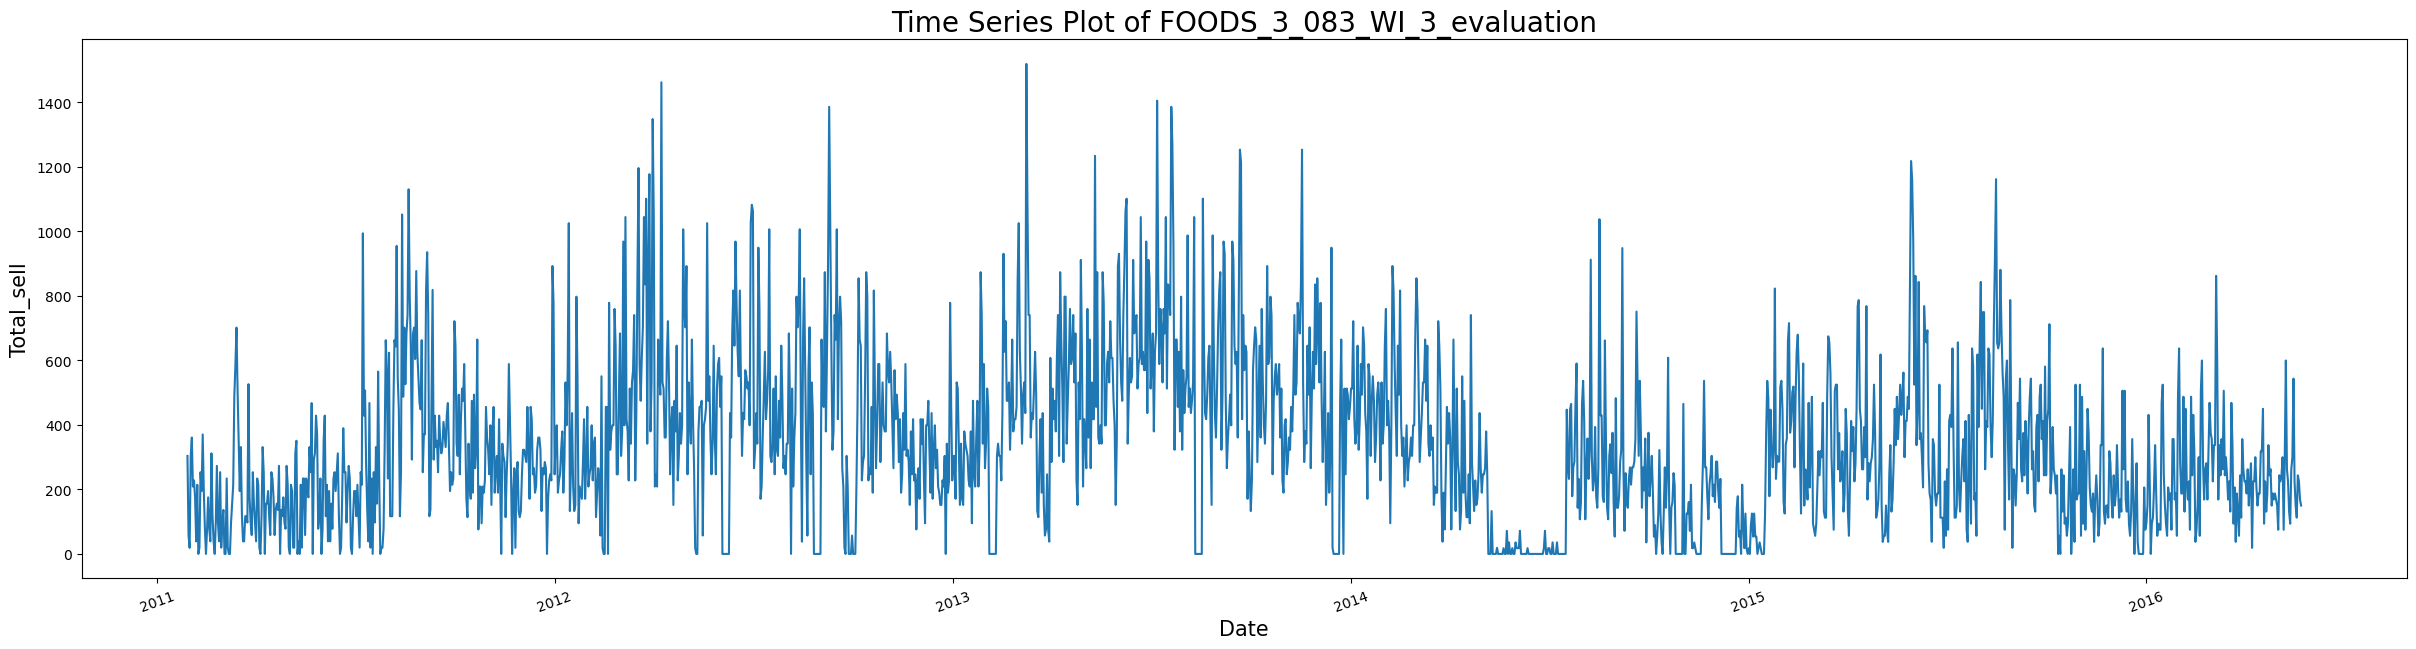

In [4]:

dim = (30,7)
plt.subplots(figsize = dim)

sns.lineplot( data = df, x = 'date', y = 'FOODS_3_083_WI_3_evaluation').set_title("Time Series Plot of FOODS_3_083_WI_3_evaluation", fontsize = 20)

plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total_sell', fontsize = 15)
plt.show()

In [5]:
type(df.columns)

pandas.core.indexes.base.Index

Check if data is stationary

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
test_result = adfuller(df['FOODS_3_083_WI_3_evaluation'])

In [8]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Static', 'p-value', '# of Legs used', 'Number of Observation Used']
    for value, label in zip(result,labels):
        print(label + ': ' + str(value))
    if(result[1] <= 0.05):
        print('Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary')
    else:
        print('Weak evidence against the null hypothesis. Accept the null hypothesis. Time Series has a unit root, indicating it is non-stationary')

In [9]:
def rolling(sales):
    dim = (30,7)
    plt.subplots(figsize = dim)
    
    moving_mean = sales.rolling(window=30).mean()
    moving_std = sales.rolling(window=30).std()
    
    original = plt.plot(sales, color = 'blue', label = 'Original')
    mean = plt.plot(moving_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(moving_std, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title("Rolling mean and STD", fontsize = 25)
    plt.show(block = False)

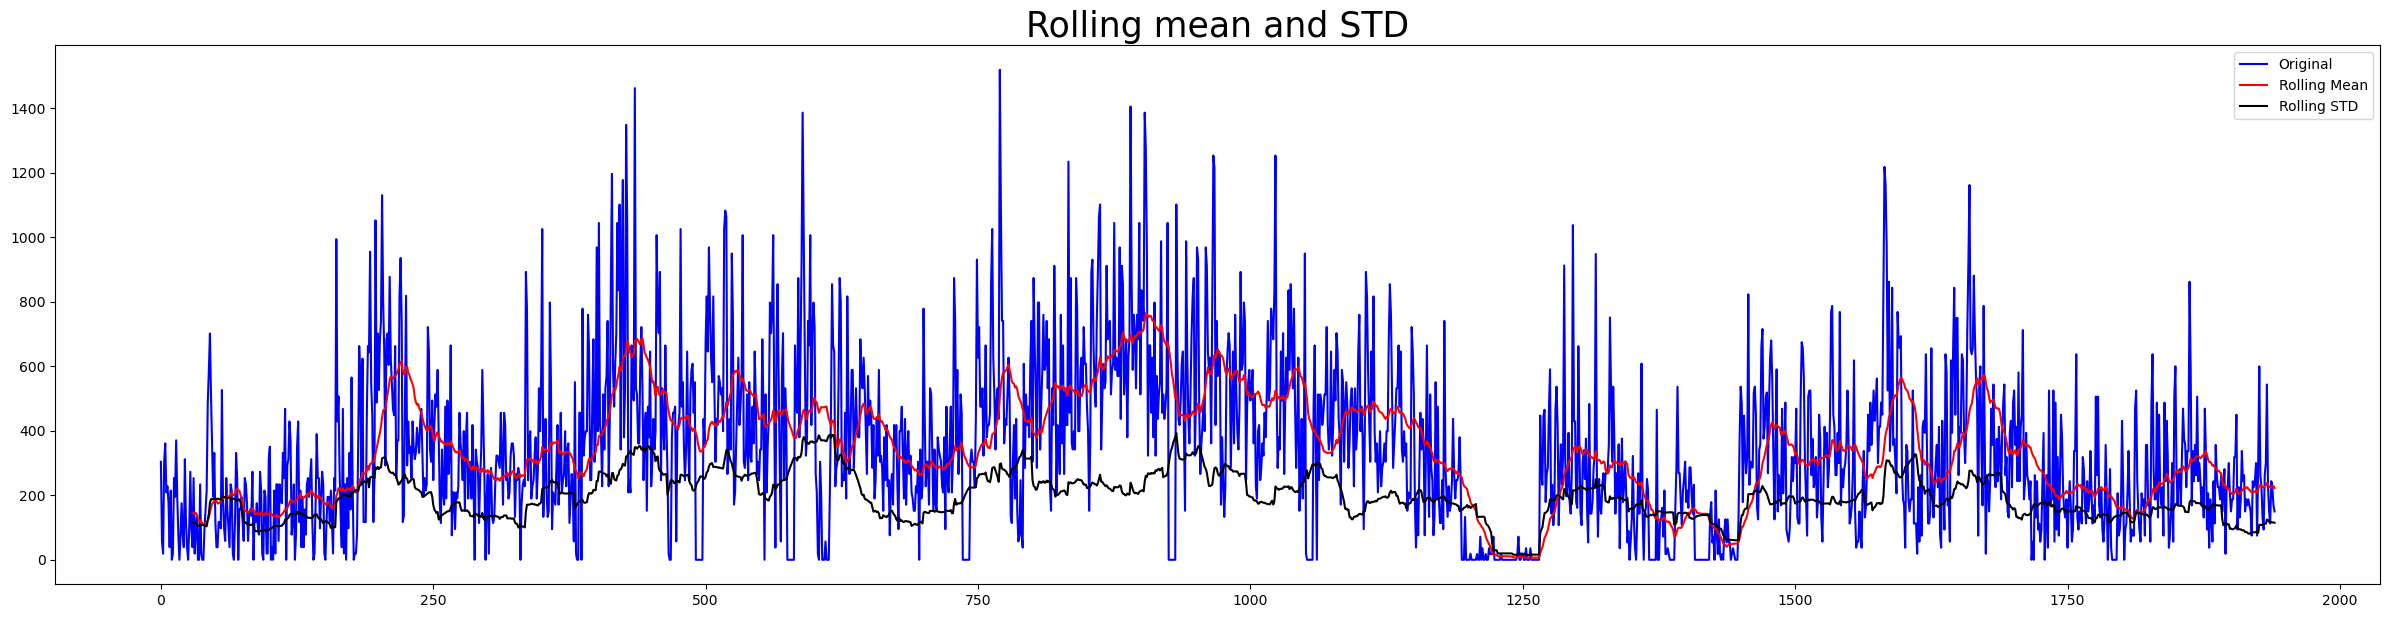

In [10]:
rolling(df['FOODS_3_083_WI_3_evaluation'])

In [11]:
adfuller_test(df['FOODS_3_083_WI_3_evaluation'])

ADF Test Static: -4.228878094585952
p-value: 0.0005885352922077299
# of Legs used: 26
Number of Observation Used: 1914
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


Auto Regression Model

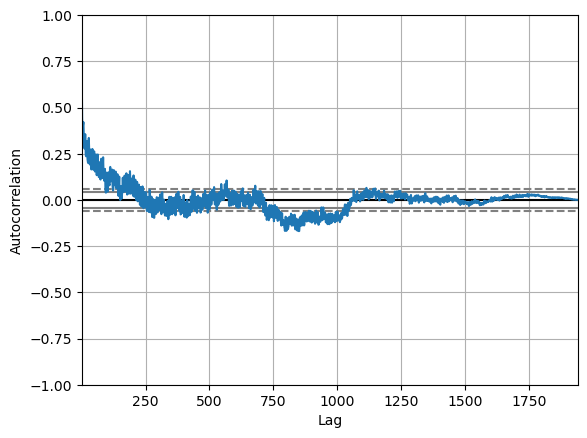

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['FOODS_3_083_WI_3_evaluation'])
plt.show()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
df = df.set_index('date')

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompositions(sales):
    decomposition = seasonal_decompose(sales)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    dim = (30,20)
    plt.subplots(figsize = dim)
    plt.subplot(411)
    plt.plot(sales, label = 'Original')
    plt.legend(loc = 'best')
    plt.title('Original Data', fontsize = 25)
    plt.subplot(412)
    plt.plot(trend, label = 'Trend')
    plt.legend(loc = 'best')
    plt.title('Trend Data', fontsize = 25)
    plt.subplot(413)
    plt.plot(seasonal, label = 'Seasonal')
    plt.legend(loc = 'best')
    plt.title('Seasonal Data', fontsize = 25)
    plt.subplot(414)
    plt.plot(residual, label = 'Residual')
    plt.legend(loc = 'best')
    plt.title('Residual Data', fontsize = 25)
    
    decomposed_data = residual
    decomposed_data.dropna(inplace = True)

    rolling(residual)
    adfuller_test(residual)

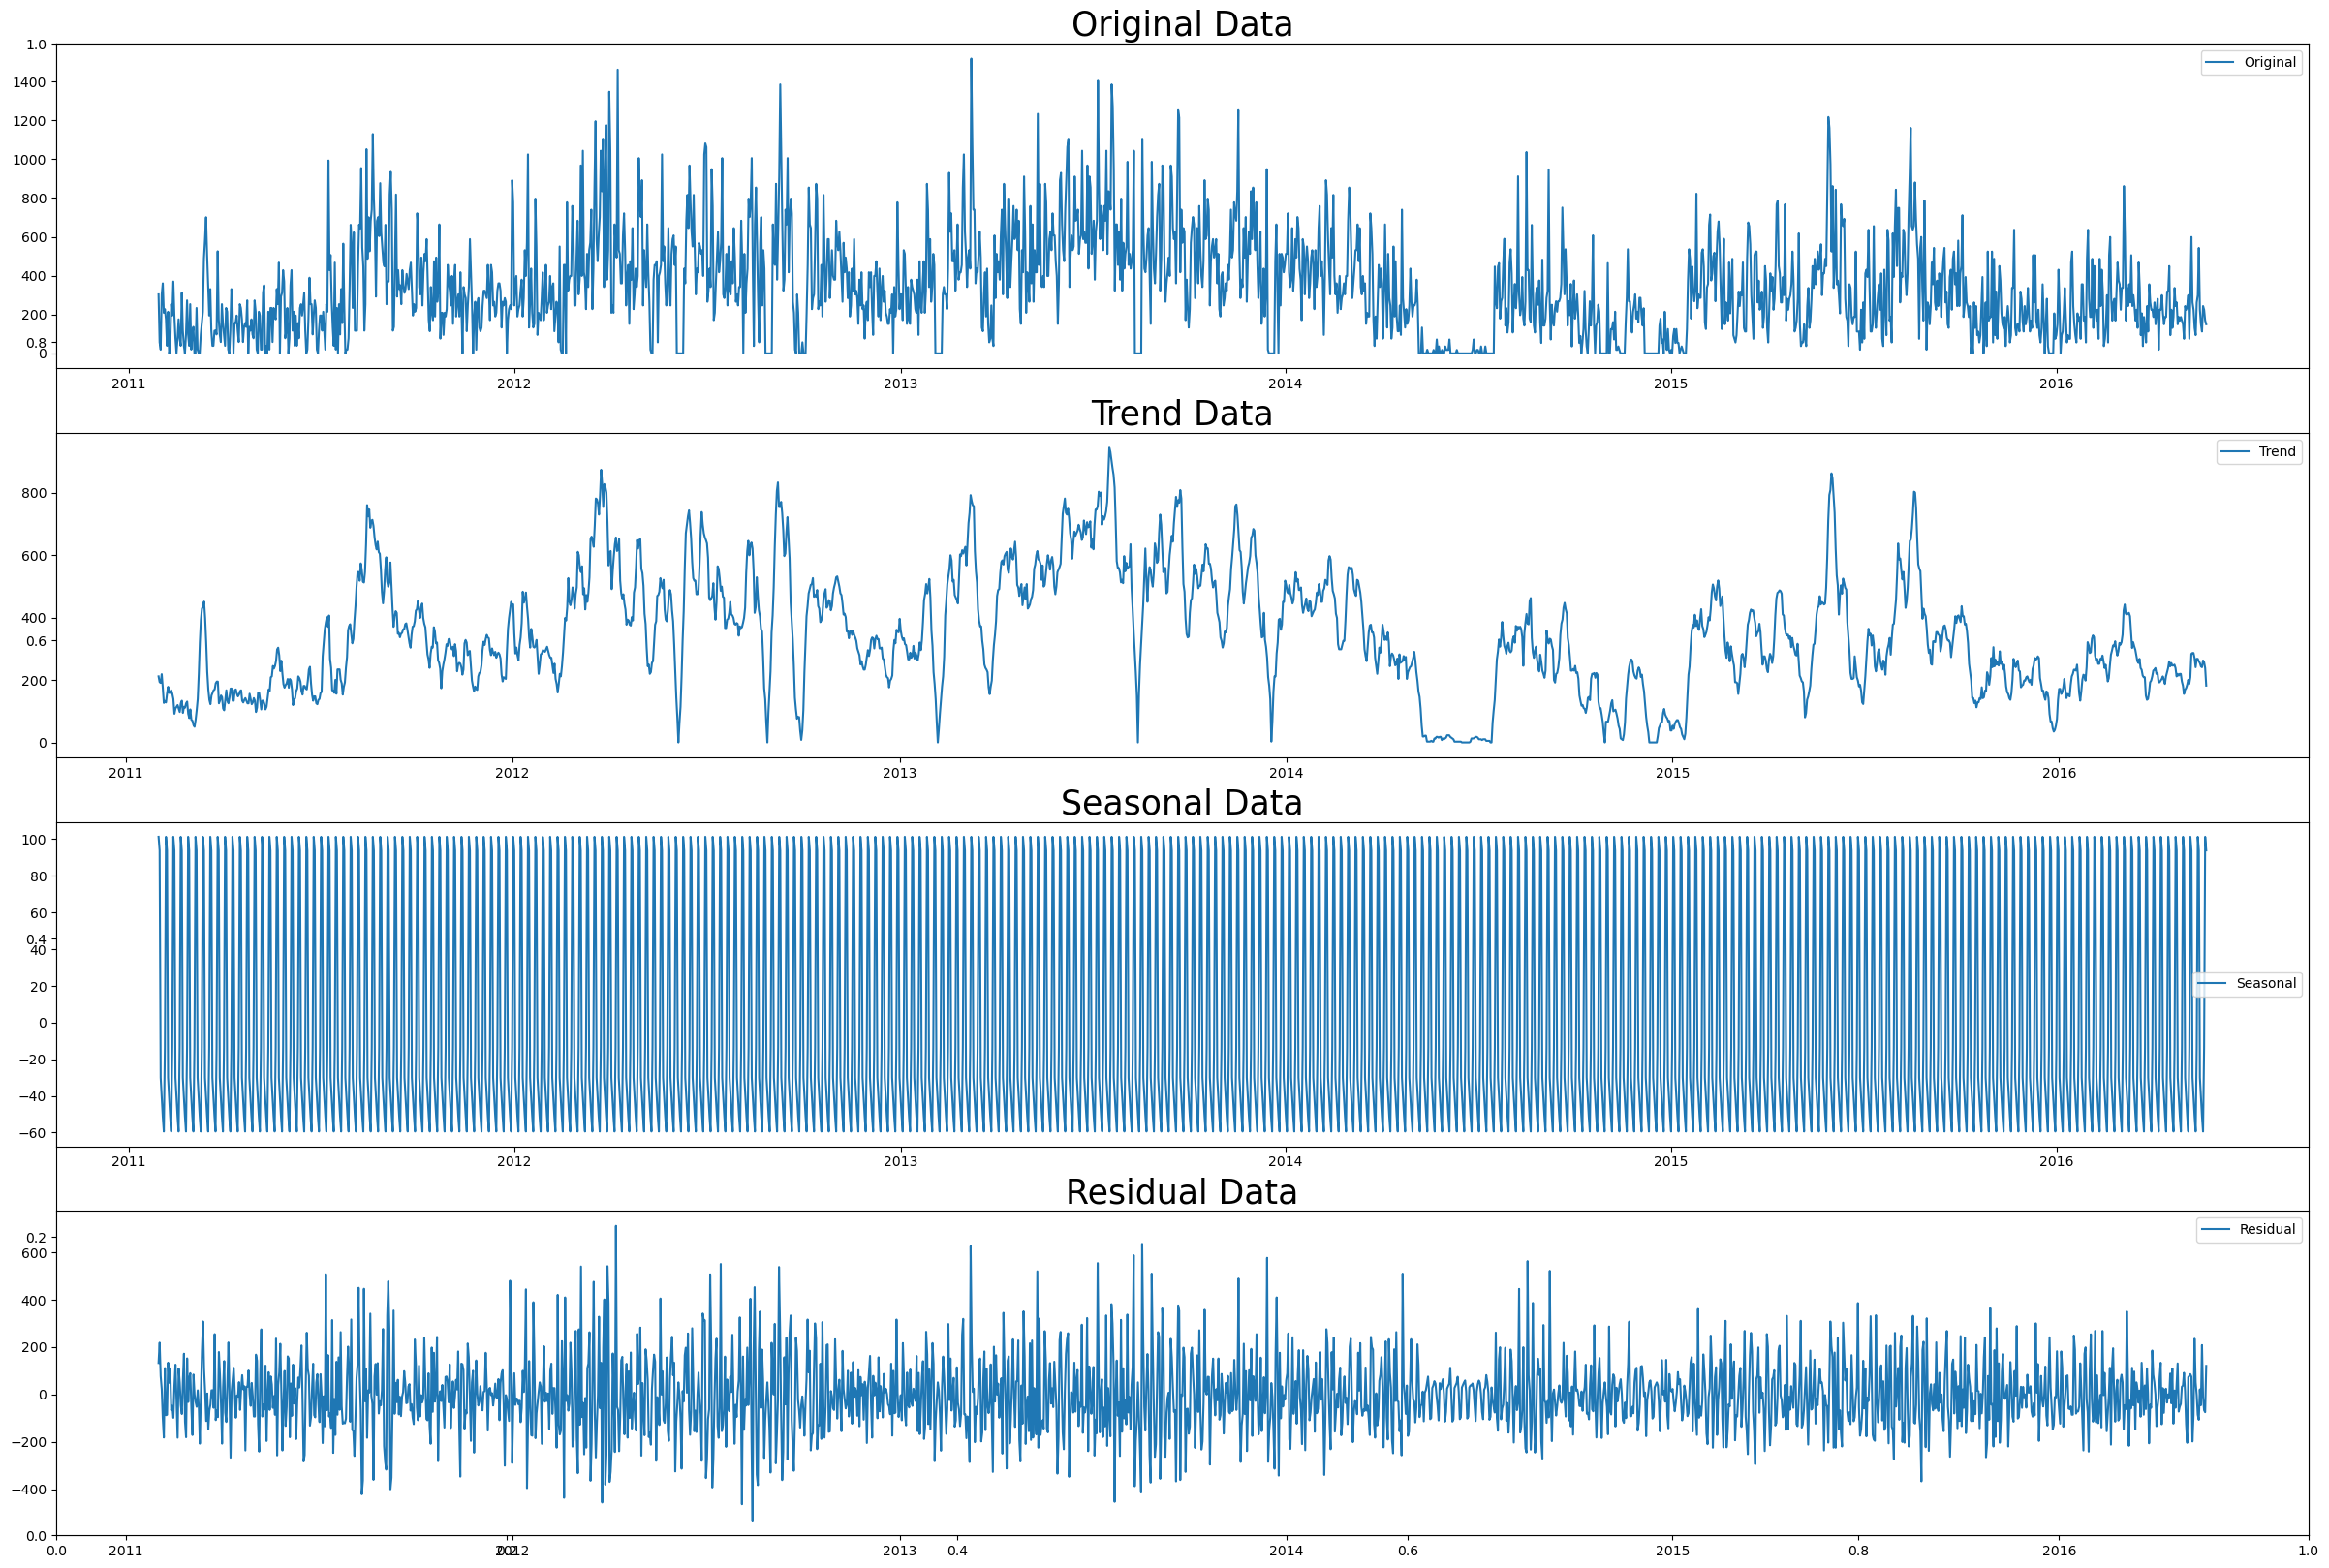

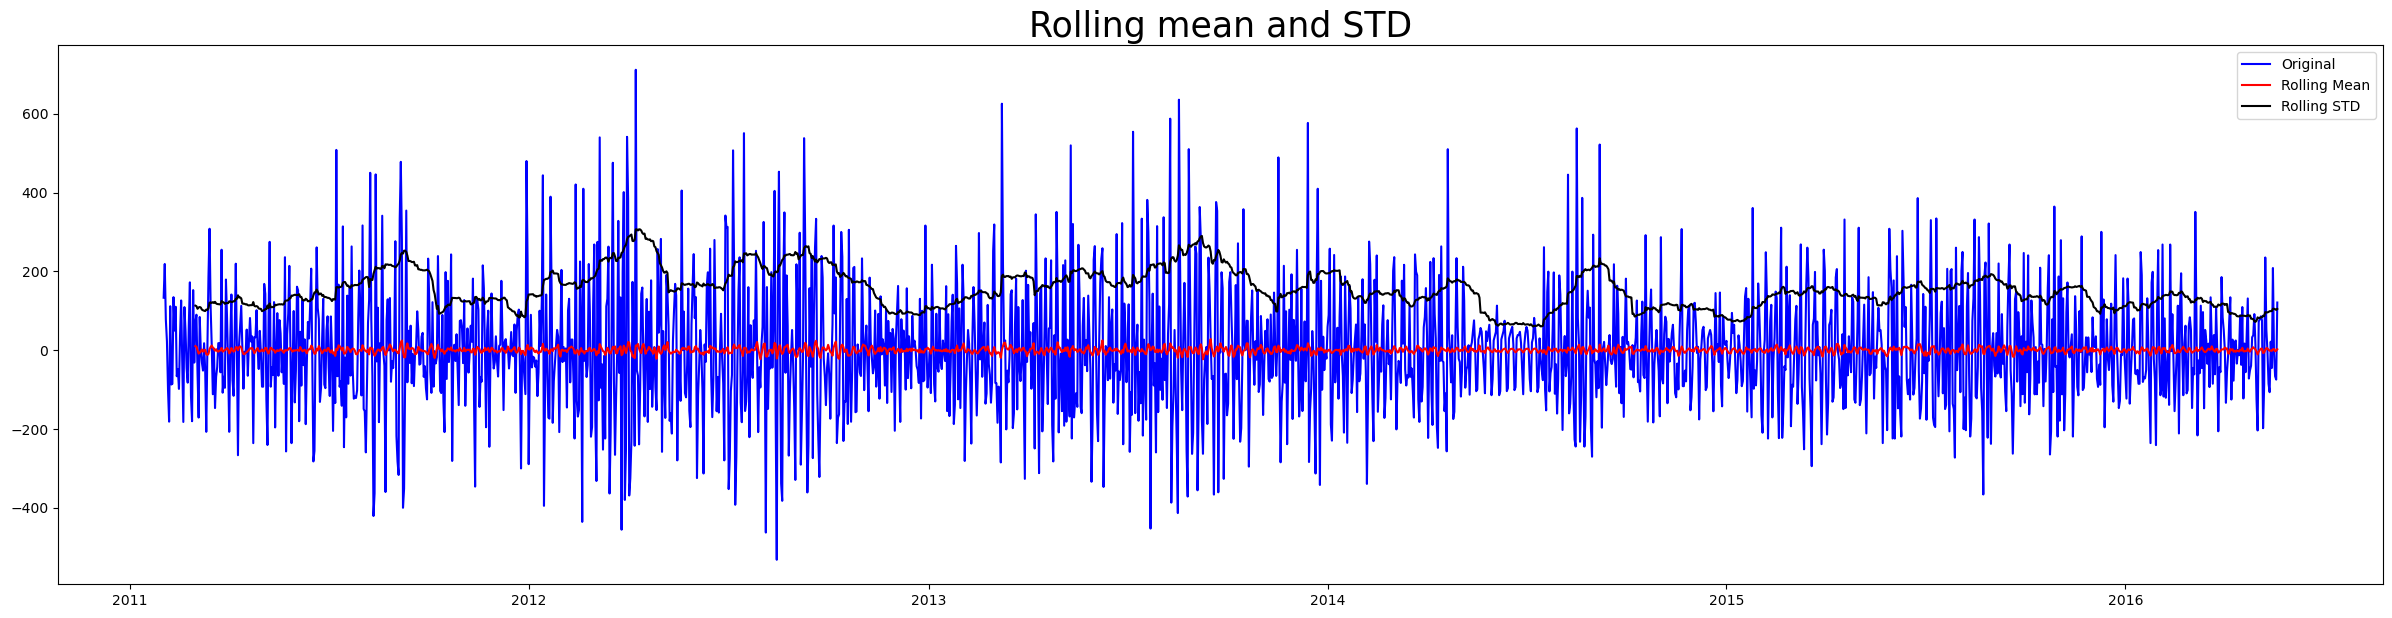

ADF Test Static: -16.705819968692552
p-value: 1.448354004675711e-29
# of Legs used: 26
Number of Observation Used: 1908
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [16]:
decompositions(df['FOODS_3_083_WI_3_evaluation'])

In [17]:
df.tail()

,FOODS_1_001_CA_1_evaluation,FOODS_1_001_CA_2_evaluation,FOODS_1_001_CA_3_evaluation,FOODS_1_001_CA_4_evaluation,FOODS_1_001_TX_1_evaluation,FOODS_1_001_TX_2_evaluation,FOODS_1_001_TX_3_evaluation,FOODS_1_001_WI_1_evaluation,FOODS_1_001_WI_2_evaluation,FOODS_1_001_WI_3_evaluation,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2016-05-18,0.00,0.0,0.00,2.24,0.00,0.00,2.24,11.20,0.00,2.24,...,5,2016,d_1937,No_Event,No_Event,No_Event,No_Event,0,0,0
2016-05-19,6.72,0.0,4.48,6.72,0.00,0.00,0.00,8.96,0.00,2.24,...,5,2016,d_1938,No_Event,No_Event,No_Event,No_Event,0,0,0
2016-05-20,6.72,0.0,6.72,0.00,4.48,11.20,2.24,2.24,0.00,0.00,...,5,2016,d_1939,No_Event,No_Event,No_Event,No_Event,0,0,0
2016-05-21,0.00,0.0,0.00,4.48,2.24,4.48,2.24,89.60,2.24,0.00,...,5,2016,d_1940,No_Event,No_Event,No_Event,No_Event,0,0,0
2016-05-22,2.24,0.0,2.24,13.44,0.00,0.00,0.00,71.68,0.00,2.24,...,5,2016,d_1941,No_Event,No_Event,No_Event,No_Event,0,0,0


In [18]:
WI = []
TX = []
CA = []
calender = []

for col in df.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
    else:
        calender.append(col)
        
# WI_del = TX.extend(CA) 
# TX_del = WI.extend(CA) 
# CA_del = TX.extend(WI) 

In [19]:

single_df = df.copy()
single_df = single_df.drop(CA, axis = 1)
single_df = single_df.drop(TX, axis = 1)
WI_single = WI.copy()
for i in WI_single:
    if i == "FOODS_3_083_WI_3_evaluation":
        WI_single.remove(i)
single_df = single_df.drop(WI_single, axis = 1)

In [20]:
single_df.fillna("no_event", inplace = True )
single_df

,FOODS_3_083_WI_3_evaluation,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,
2011-01-29,303.68,11101,Saturday,1,1,2011,d_1,No_Event,No_Event,No_Event,No_Event,0,0,0
2011-01-30,56.94,11101,Sunday,2,1,2011,d_2,No_Event,No_Event,No_Event,No_Event,0,0,0
2011-01-31,18.98,11101,Monday,3,1,2011,d_3,No_Event,No_Event,No_Event,No_Event,0,0,0
2011-02-01,303.68,11101,Tuesday,4,2,2011,d_4,No_Event,No_Event,No_Event,No_Event,1,1,0
2011-02-02,360.62,11101,Wednesday,5,2,2011,d_5,No_Event,No_Event,No_Event,No_Event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,112.38,11616,Wednesday,5,5,2016,d_1937,No_Event,No_Event,No_Event,No_Event,0,0,0
2016-05-19,243.49,11616,Thursday,6,5,2016,d_1938,No_Event,No_Event,No_Event,No_Event,0,0,0
2016-05-20,224.76,11616,Friday,7,5,2016,d_1939,No_Event,No_Event,No_Event,No_Event,0,0,0


In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
train = df['2016/04/01':'2016/05/15']
test = df['2016/05/15':]

In [23]:
test.shape

(8, 30503)

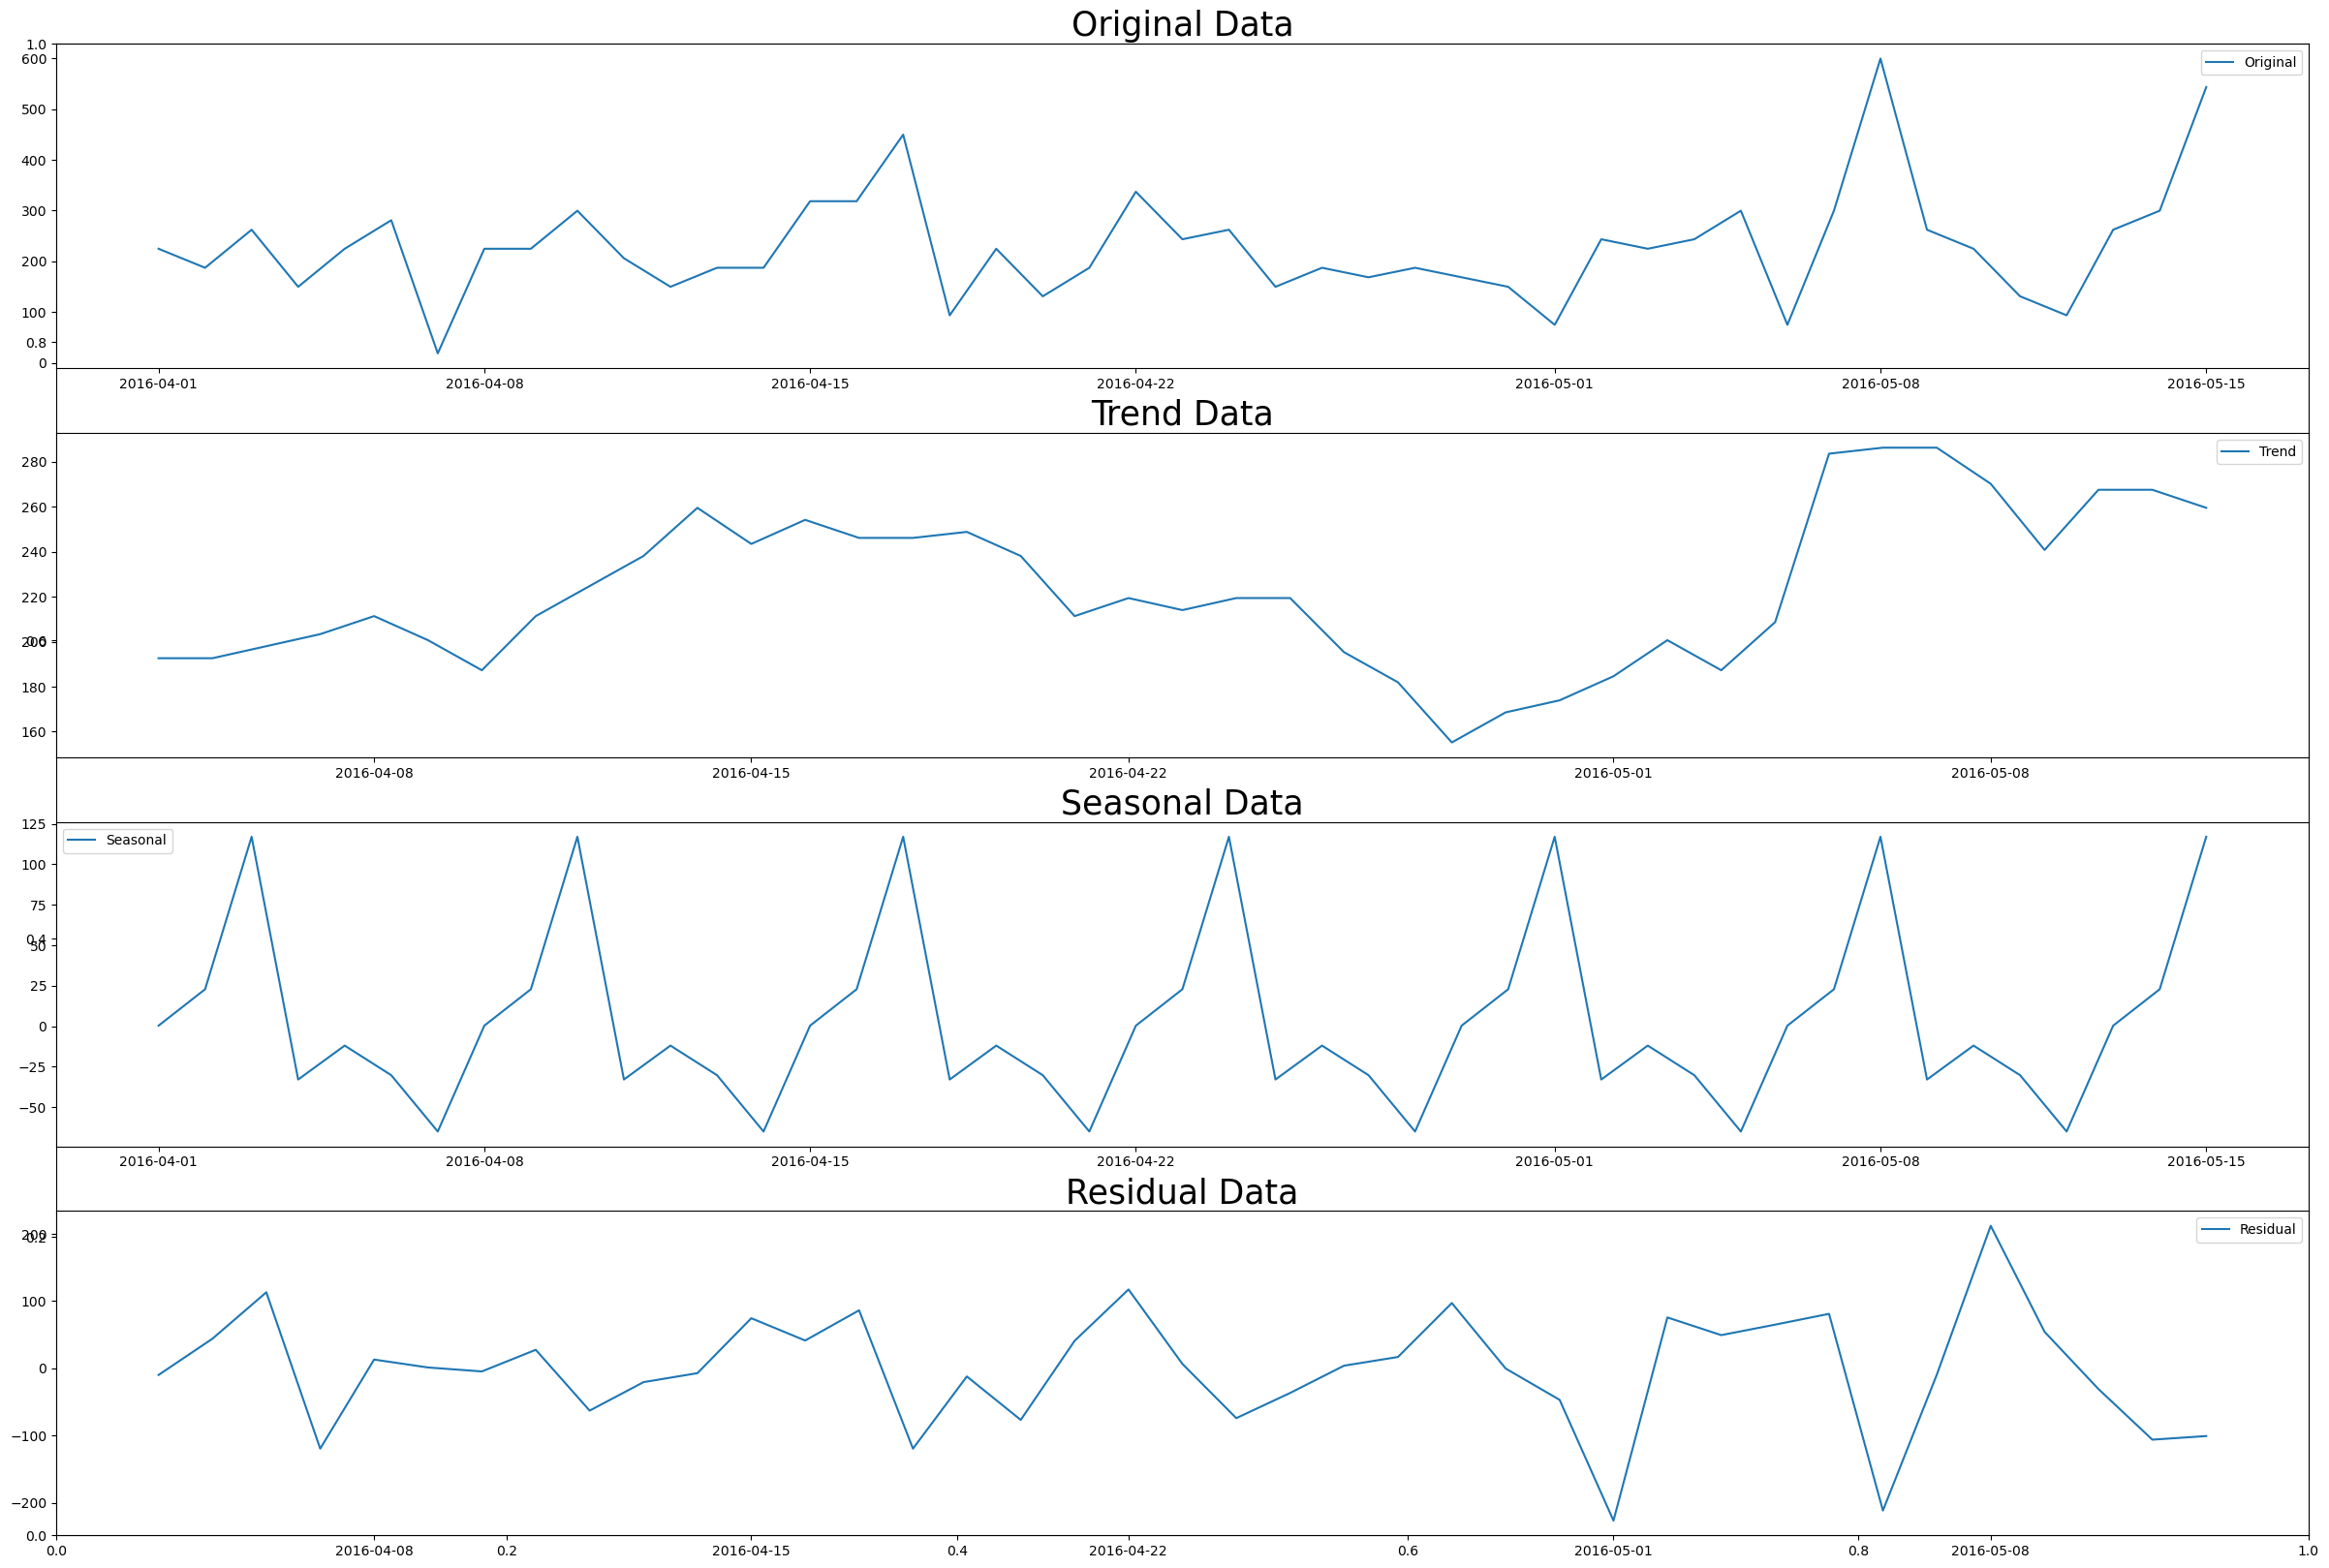

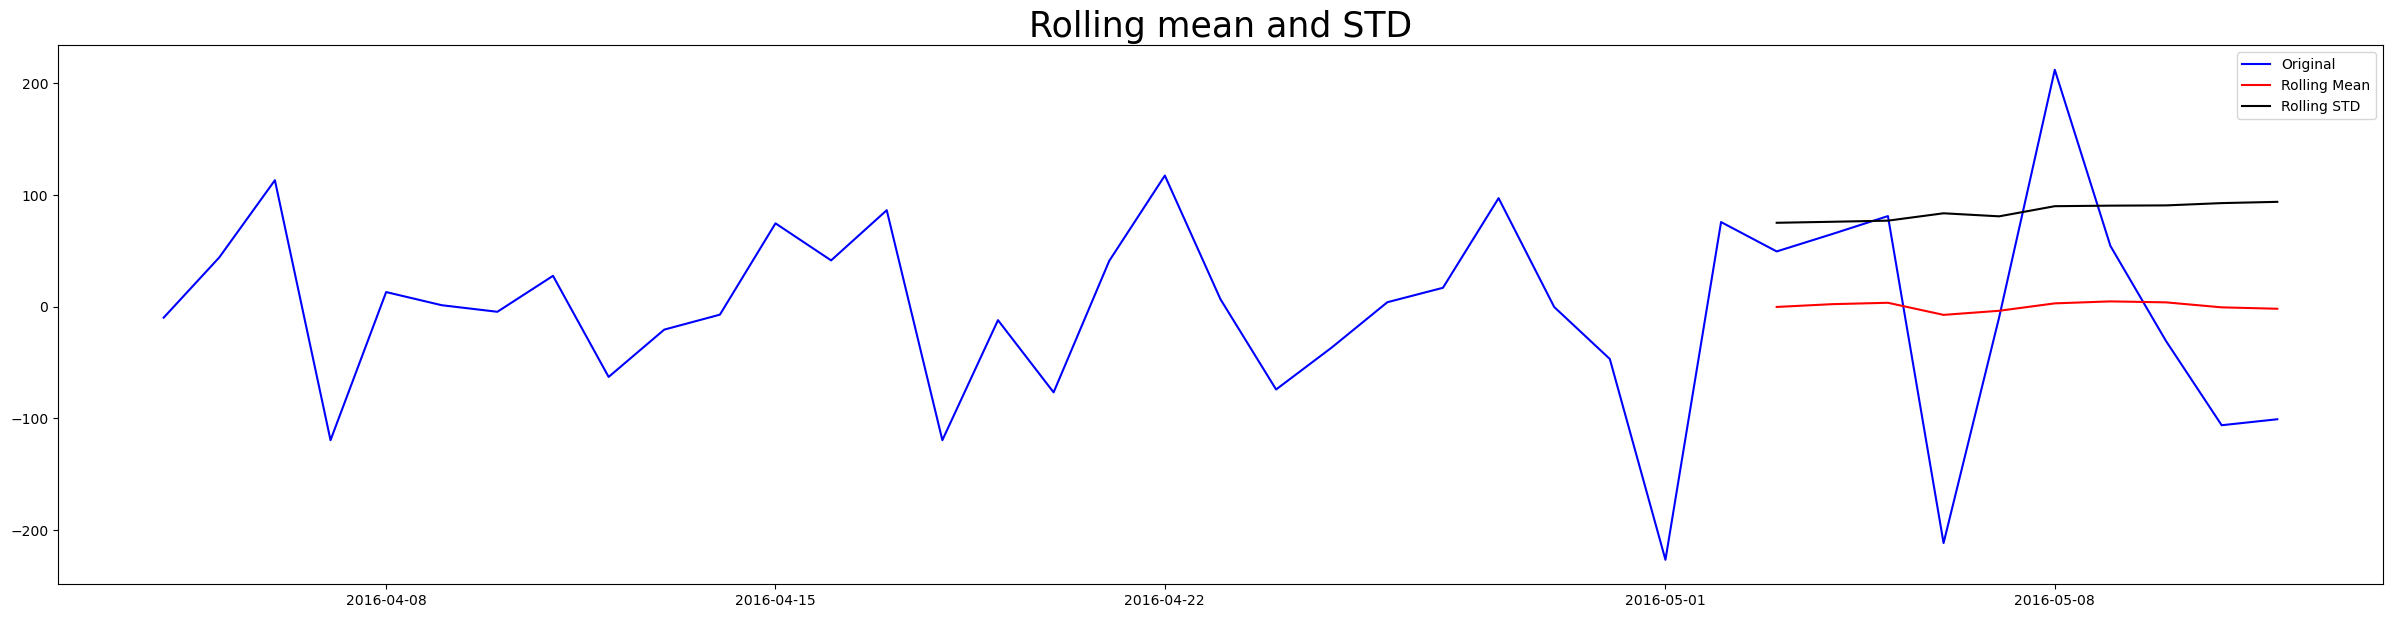

ADF Test Static: -7.5666600283399585
p-value: 2.913607892712646e-11
# of Legs used: 3
Number of Observation Used: 35
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [24]:
decompositions(train['FOODS_3_083_WI_3_evaluation'])

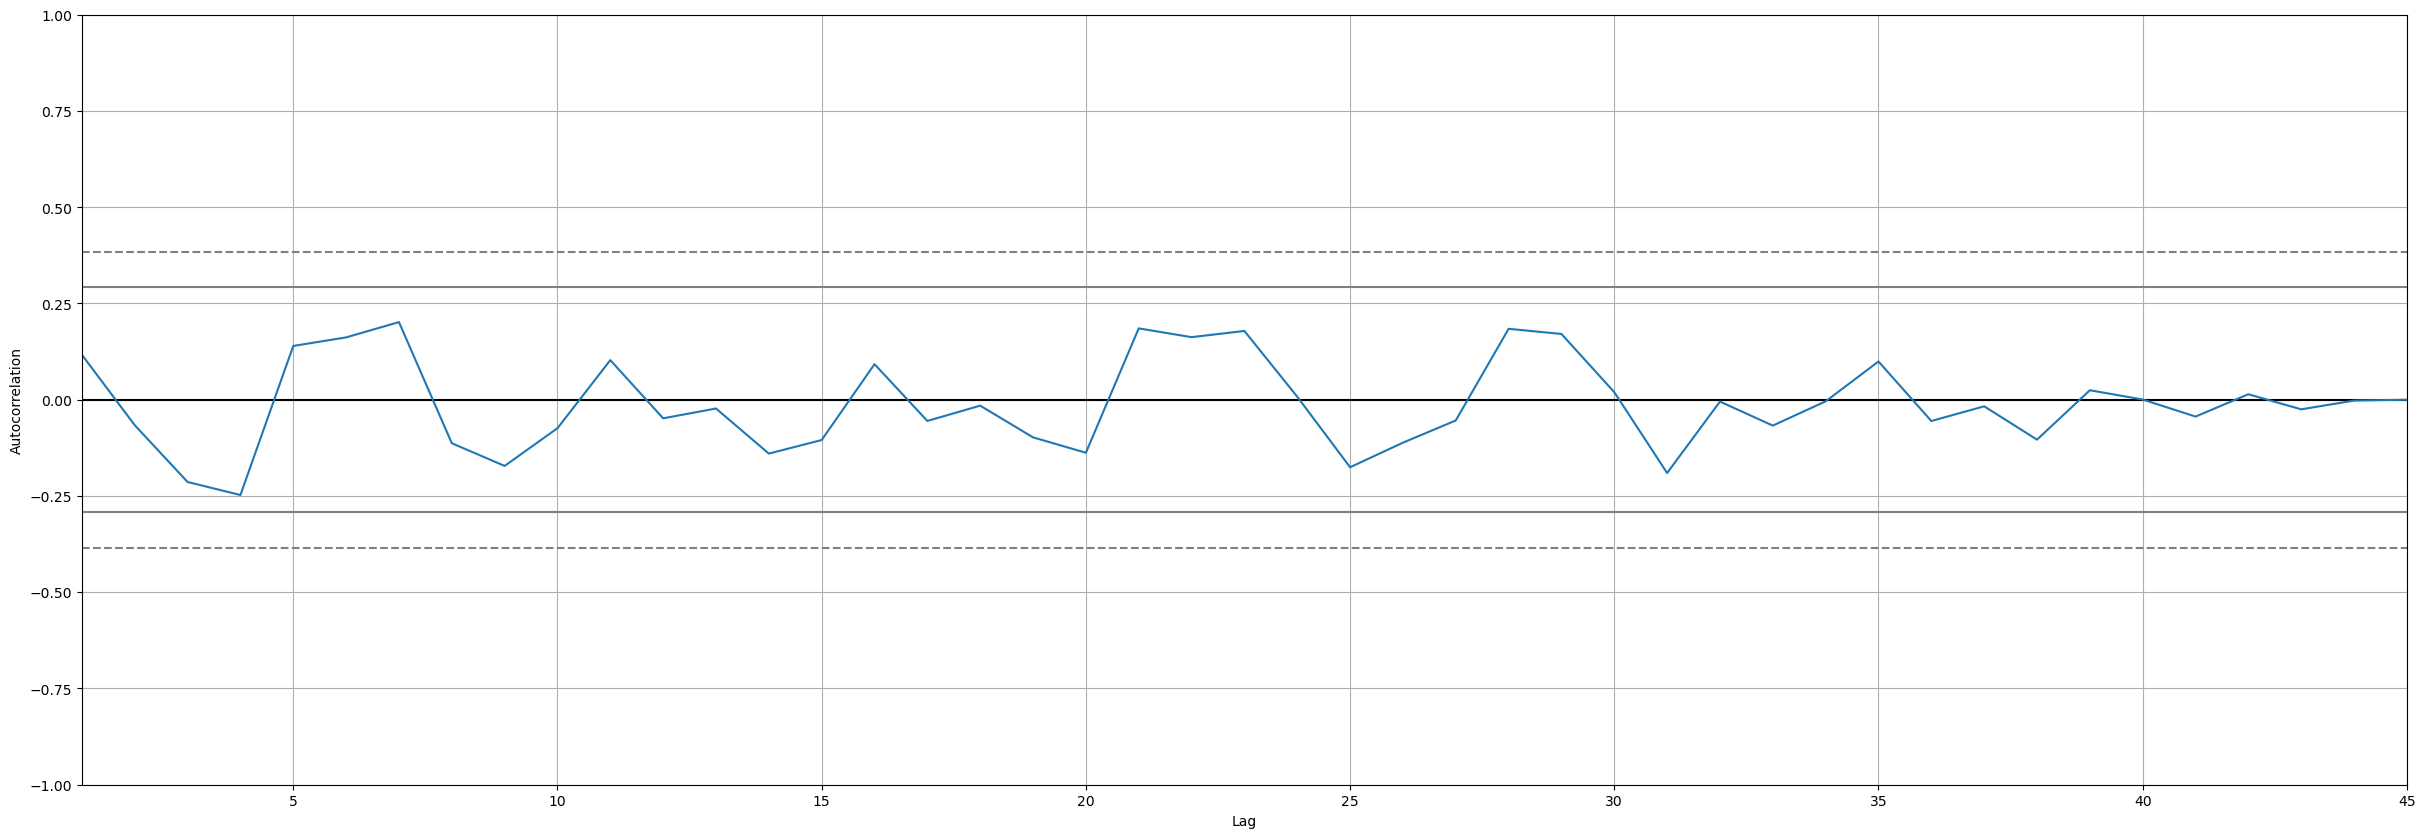

In [25]:
from pandas.plotting import autocorrelation_plot

dim = (30,10)
plt.subplots(figsize = dim)
autocorrelation_plot(train['FOODS_3_083_WI_3_evaluation'])
plt.show()

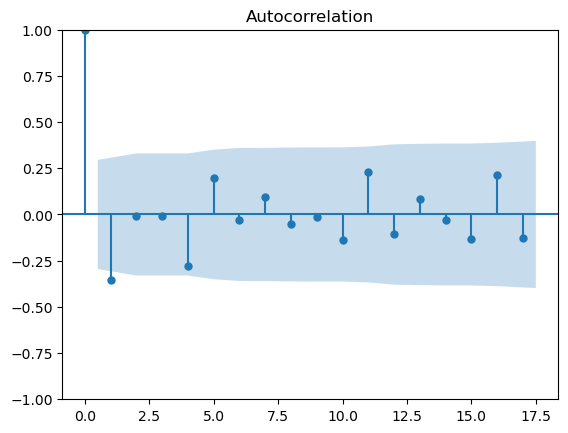

In [26]:
plot_acf(train['FOODS_3_083_WI_3_evaluation'].diff().dropna())
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


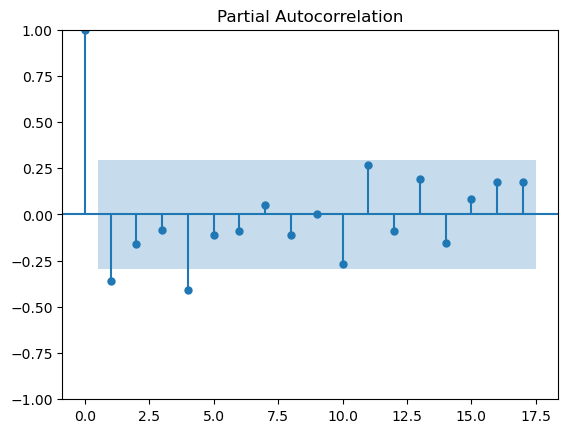

In [27]:
plot_pacf(train['FOODS_3_083_WI_3_evaluation'].diff().dropna())
plt.show()

In [28]:
#p = 1, q = 3, d = 0

In [29]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA


In [30]:
single = df['FOODS_3_083_WI_3_evaluation'].copy()
single = single['2016/04/01':].copy()
single_test = test['FOODS_3_083_WI_3_evaluation'].copy()
single_train = train['FOODS_3_083_WI_3_evaluation'].copy()

In [31]:
single = single.to_frame()
test_date, single_test = single_test.reset_index()['date'], single_test.to_frame()
train_date, single_train = single_train.reset_index()['date'],  single_train.to_frame()

In [32]:
print(single_test.shape[0])
print(single_train.shape[0])

8
45


In [33]:
single_test.reset_index()

,date,FOODS_3_083_WI_3_evaluation
0,2016-05-15,543.17
1,2016-05-16,224.76
2,2016-05-17,149.84
3,2016-05-18,112.38
4,2016-05-19,243.49
5,2016-05-20,224.76
6,2016-05-21,168.57
7,2016-05-22,149.84


In [34]:
single_test

,FOODS_3_083_WI_3_evaluation
date,
2016-05-15,543.17
2016-05-16,224.76
2016-05-17,149.84
2016-05-18,112.38
2016-05-19,243.49
2016-05-20,224.76
2016-05-21,168.57
2016-05-22,149.84


In [35]:
from  statsmodels.tsa.arima.model import ARIMA
model = ARIMA(single_train,order=(1,0,3))
model_fit = model.fit()
prediction = model_fit.predict(start = single_test.index[0], end = single_test.index[-1])
single['predict_arma'] = prediction
single.tail()

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,FOODS_3_083_WI_3_evaluation,predict_arma
date,,
2016-05-18,112.38,122.281292
2016-05-19,243.49,158.439848
2016-05-20,224.76,181.710961
2016-05-21,168.57,196.687905
2016-05-22,149.84,206.326845


In [36]:
print(model_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:     FOODS_3_083_WI_3_evaluation   No. Observations:                   45
Model:                          ARIMA(1, 0, 3)   Log Likelihood                -272.649
Date:                         Mon, 26 Feb 2024   AIC                            557.299
Time:                                 16:38:33   BIC                            568.138
Sample:                             04-01-2016   HQIC                           561.340
                                  - 05-15-2016                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.7321     10.088     22.177      0.000     203.959     243.505
ar.L1          0.6436      0.529      1.217      0.224     

In [37]:
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='date', ylabel='FOODS_3_083_WI_3_evaluation'>

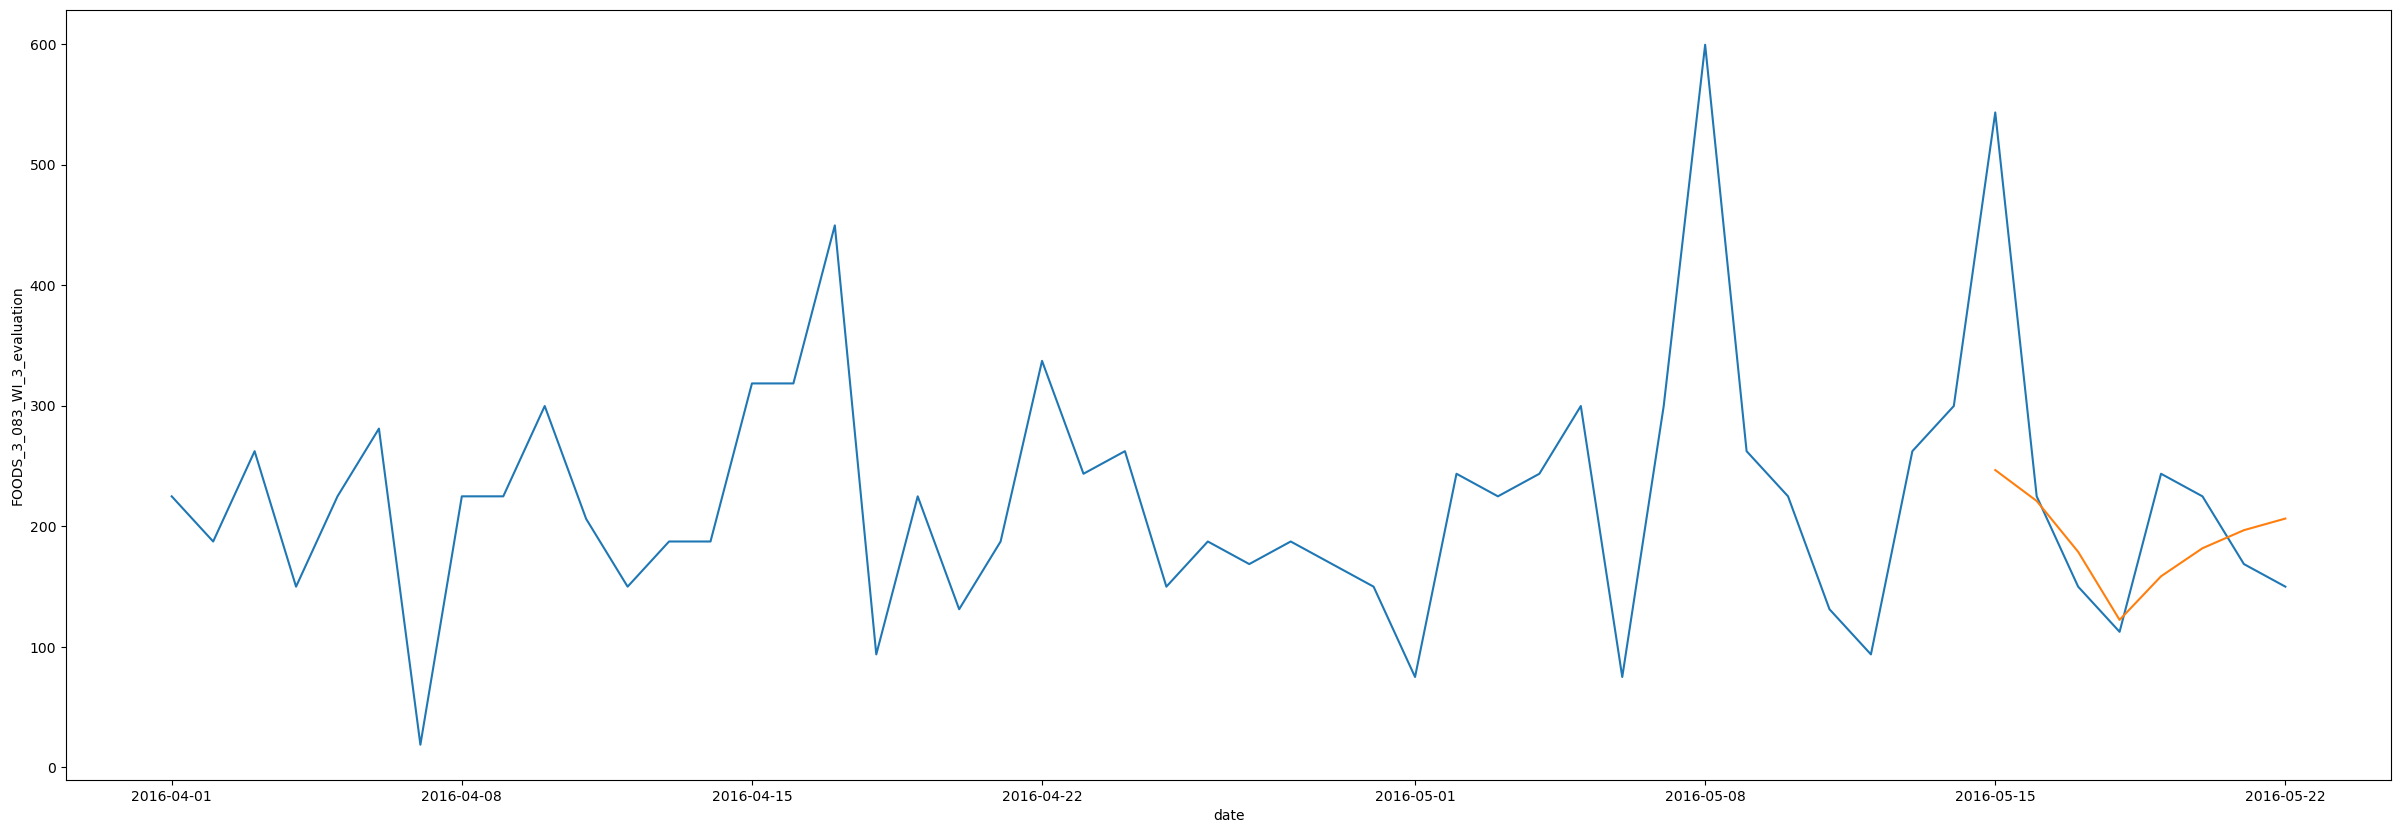

In [38]:
import seaborn as sns

dim = (30,10)
plt.subplots(figsize = dim)
sns.lineplot(data = single, x = single.index, y =  'FOODS_3_083_WI_3_evaluation')
sns.lineplot(data = single, x = single.index, y =  'predict_arma')

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [40]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [41]:
def APE(Y_actual, Y_Predicted):
    ape = np.abs((Y_actual - Y_Predicted)/Y_actual)
    return ape

In [42]:
cal_rsme = np.sqrt(mean_squared_error(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_arma'].dropna()))
print("RSME: ", cal_rsme)
cal_mape = MAPE(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_arma'])
print("MAPE: ",cal_mape)

RSME:  112.91521125581313
MAPE:  24.110411451559457


#### SARIMA

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


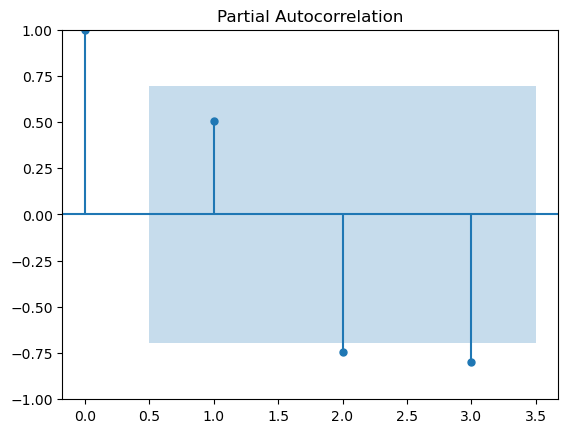

In [44]:
plot_pacf(single['predict_arma'].dropna(), lags = 3)
plt.show()

In [45]:
model_s = SARIMAX(single_train['FOODS_3_083_WI_3_evaluation'], order = (1,0,3), seasonal_order = (1,0,3,7))
model_s_fit = model_s.fit()
prediction_s = model_s_fit.predict(start = single_test.index[0], end = single_test.index[-1])
single['predict_sarima'] = prediction_s

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too fe

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='date', ylabel='FOODS_3_083_WI_3_evaluation'>

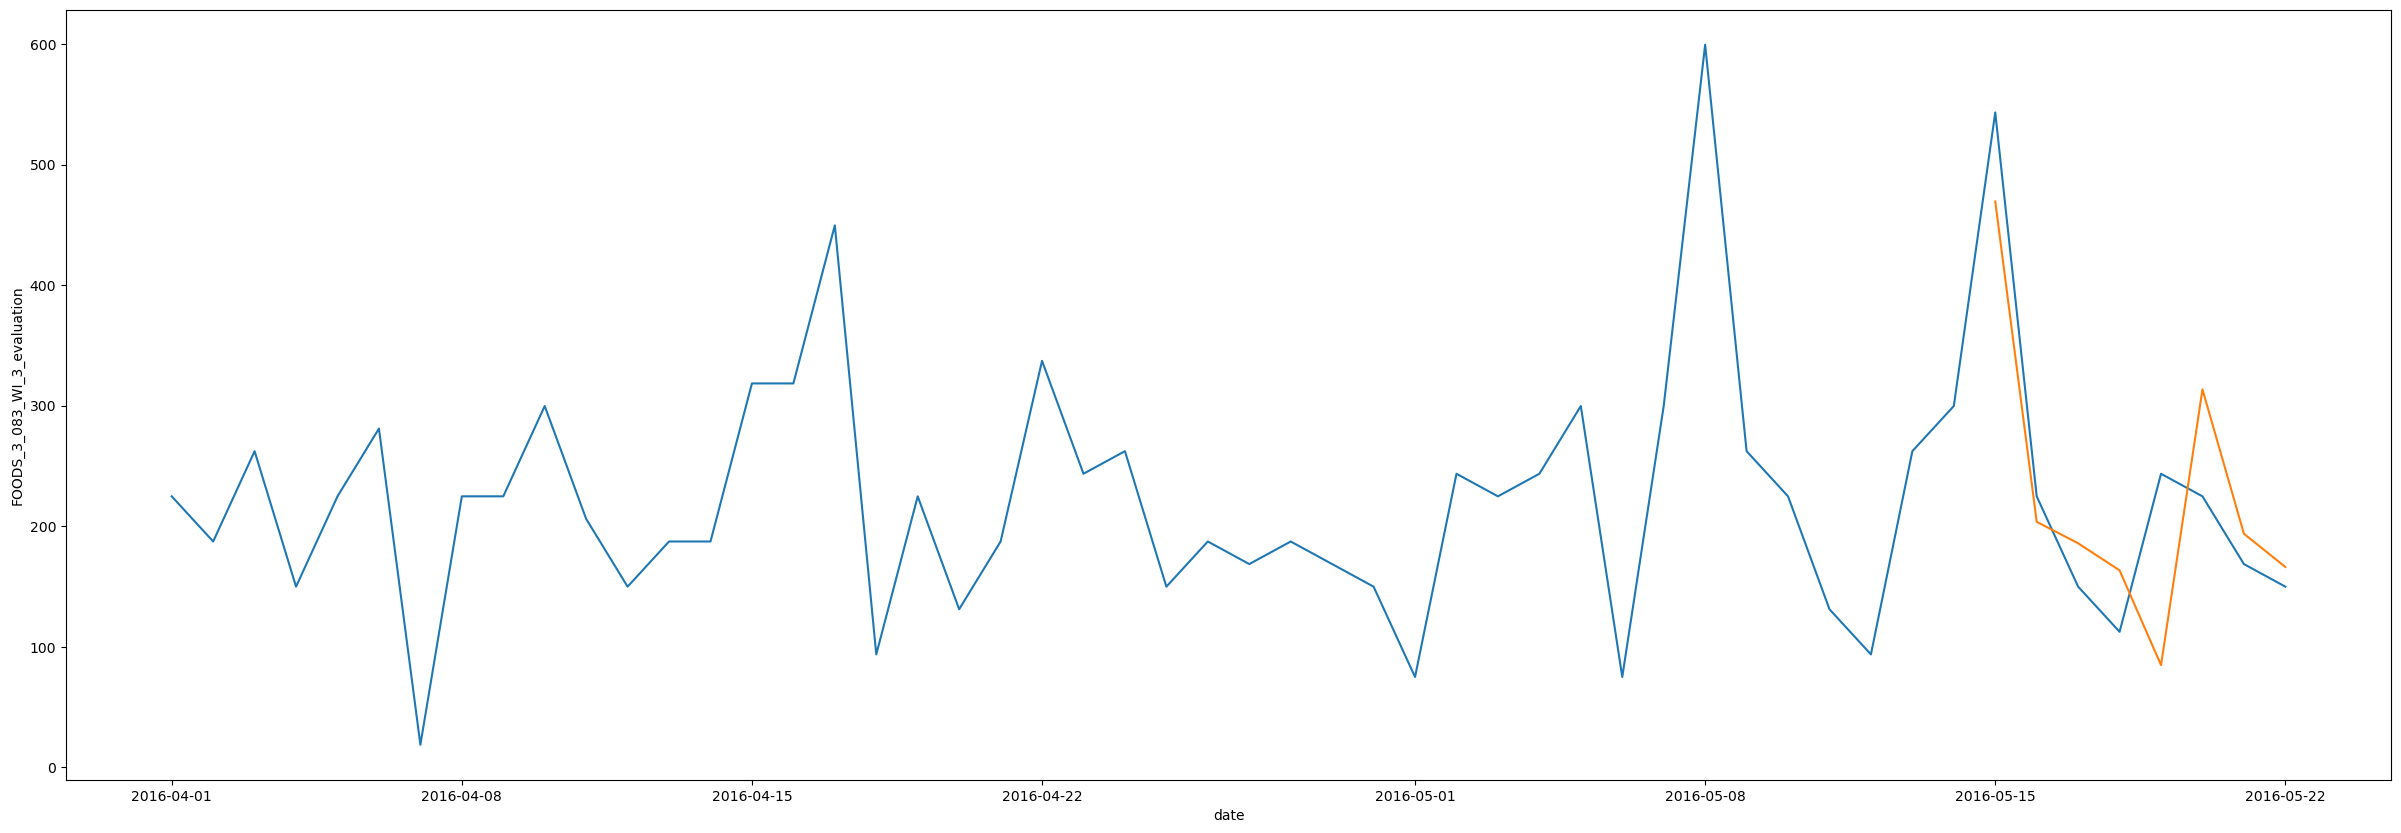

In [46]:
dim = (30,10)
plt.subplots(figsize = dim)
sns.lineplot(data = single, x = single.index, y =  'FOODS_3_083_WI_3_evaluation')
sns.lineplot(data = single, x = single.index, y =  'predict_sarima')

In [47]:
cal_rsme = np.sqrt(mean_squared_error(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_sarima'].dropna()))
print("RSME: ", cal_rsme)
cal_mape = MAPE(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_sarima'])
print("MAPE: ",cal_mape)


RSME:  73.9554463152323
MAPE:  27.85614474544825


Resedual

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Resedual of SARIMA')

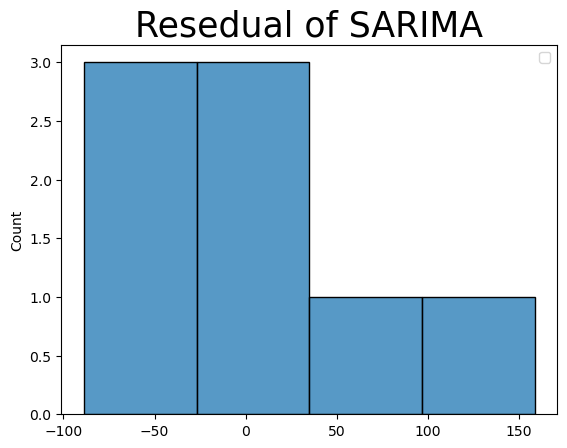

In [48]:
sns.histplot(data = (single['2016-05-15':]['FOODS_3_083_WI_3_evaluation'] - single['2016-05-15':]['predict_sarima']))
plt.legend(loc = 'best')
plt.title('Resedual of SARIMA', fontsize = 25)

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Resedual of ARIMA')

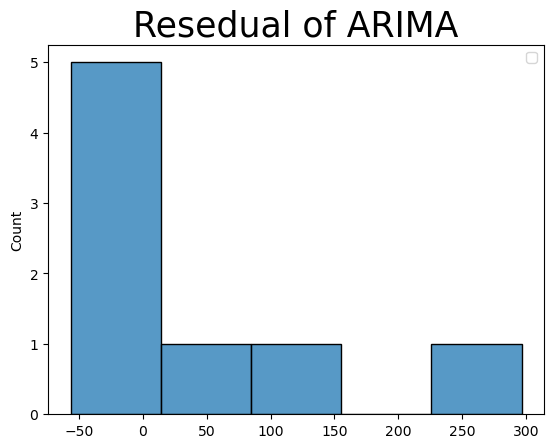

In [49]:
sns.histplot(data = (single['2016-05-15':]['FOODS_3_083_WI_3_evaluation'] - single['2016-05-15':]['predict_arma']))
plt.legend(loc = 'best')
plt.title('Resedual of ARIMA', fontsize = 25)

In [50]:
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

In [51]:
np.sqrt(mean_squared_error(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_sarima'].dropna()))

73.9554463152323

In [52]:
single_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1941 entries, 2011-01-29 to 2016-05-22
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FOODS_3_083_WI_3_evaluation  1941 non-null   float64
 1   wm_yr_wk                     1941 non-null   int64  
 2   weekday                      1941 non-null   object 
 3   wday                         1941 non-null   int64  
 4   month                        1941 non-null   int64  
 5   year                         1941 non-null   int64  
 6   d                            1941 non-null   object 
 7   event_name_1                 1941 non-null   object 
 8   event_type_1                 1941 non-null   object 
 9   event_name_2                 1941 non-null   object 
 10  event_type_2                 1941 non-null   object 
 11  snap_CA                      1941 non-null   int64  
 12  snap_TX                      1941 non-null   int64  
 13  

In [53]:
single_df.date = pd.to_datetime(single_df.date)
single_df.info

AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
single_df_linear = single_df.reset_index()
single_df_linear

single_df_linear = single_df.groupby(['event_name_1'])['d'].count().to_frame('event type')
event_name_list = pd.DataFrame()
event_name_list['event'] = single_df_linear.index

In [ ]:
event_name_list

In [ ]:
single_df_linear = single_df.groupby(['event_type_1'])['d'].count().to_frame('event type')
event_type_list = pd.DataFrame()
event_type_list['event_type'] = single_df_linear.index
event_type_list

In [ ]:
single_df_linear = single_df.groupby(['weekday'])['d'].count().to_frame('Week days')
weekday_list = pd.DataFrame()
weekday_list['weekday'] = single_df_linear.index
weekday_list

In [ ]:
single_df['event_name_1_index'] = single_df.apply(lambda x: (np.where(x['event_name_1'] == event_name_list['event'])[0][0]), axis =1)
single_df['event_name_2_index'] = single_df.apply(lambda x: (np.where(x['event_name_2'] == event_name_list['event'])[0][0]), axis =1)
single_df['event_type_1_index'] = single_df.apply(lambda x: (np.where(x['event_type_1'] == event_type_list['event_type'])[0][0]), axis =1)
single_df['event_type_2_index'] = single_df.apply(lambda x: (np.where(x['event_type_2'] == event_type_list['event_type'])[0][0]), axis =1)
single_df['weekday_index'] = single_df.apply(lambda x: (np.where(x['weekday'] == weekday_list['weekday'])[0][0]), axis =1)

In [ ]:
single_df.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)

In [ ]:
single_df_temp = single_df.copy()
single_df_temp = single_df_temp.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)
# single_df_temp.set_index('date')
split_date_1 = '2016-04-01'
split_date_2 = '2016-05-15'
train_temp = single_df_temp.loc[(single_df_temp.index >=split_date_1) & (single_df_temp.index < split_date_2)]
test_temp = single_df_temp.loc[single_df_temp.index >= split_date_2 ]

In [ ]:
single_df_temp.info()

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

train_X = pd.DataFrame()
train_Y = pd.DataFrame()
test_X = pd.DataFrame()
test_Y = pd.DataFrame()
train_X = train_temp.drop('FOODS_3_083_WI_3_evaluation',axis = 1)
train_Y = train_temp['FOODS_3_083_WI_3_evaluation']
test_X = test_temp.drop('FOODS_3_083_WI_3_evaluation',axis = 1)
test_Y['actual'] = test_temp['FOODS_3_083_WI_3_evaluation'].copy()
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
trained_model_XGBoost = model.fit(train_X, train_Y.values)
# trained_model = model.fit(train_X, train_Y.values, eval_set=[(train_X, train_Y.values), (test_X, test_Y.values)], early_stopping_rounds=50)

In [ ]:
type(test_Y)

In [ ]:
print(test_Y)

In [ ]:
test_Y['forecast_XGboost'] = trained_model_XGBoost.predict(test_X)

In [ ]:
xgb.plot_importance(trained_model_XGBoost, height = 0.5)
plt.show()

In [ ]:
plt.scatter(test_Y['actual'],test_Y['forecast_XGboost'])

In [ ]:
dim = (30,10)
plt.subplots(figsize = dim)
plt.plot(test_Y['actual'], label = 'Expected')
plt.plot(test_Y['forecast_XGboost'], label = 'Forecasted')
plt.legend()
plt.show()

In [ ]:
cal_rsme = np.sqrt(mean_squared_error(test_Y['actual'],test_Y['forecast_XGboost']))
print("RSME: ", cal_rsme)
cal_mape = MAPE(test_Y['actual'],test_Y['forecast_XGboost'])
print("MAPE: ",cal_mape)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
trained_model_linear = model.fit(train_X, train_Y.values)
test_Y['forecast_linear'] = trained_model_linear.predict(test_X)

In [ ]:
cal_rsme = np.sqrt(mean_squared_error(test_Y['actual'],test_Y['forecast_linear']))
print("RSME: ", cal_rsme)
cal_mape = MAPE(test_Y['actual'],test_Y['forecast_linear'])
print("MAPE: ",cal_mape)

In [ ]:
dim = (30,10)
plt.subplots(figsize = dim)
plt.plot(test_Y['actual'], label = 'Expected')
plt.plot(test_Y['forecast_XGboost'], label = 'Forecasted_XGBoost')
plt.plot(test_Y['forecast_linear'], label = 'Forecasted_Linear')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict


scores = cross_val_score(trained_model_XGBoost, single_df_temp.drop('FOODS_3_083_WI_3_evaluation',axis = 1), single_df_temp['FOODS_3_083_WI_3_evaluation'], cv=10)
print ("XGBoost Regression:")
print ("Cross-validated scores: ", scores)
print ("Mean Cross validation: ",scores.mean())
print ("Standard deviation: ", scores.std())
scores = cross_val_score(trained_model_linear, single_df_temp.drop('FOODS_3_083_WI_3_evaluation',axis = 1), single_df_temp['FOODS_3_083_WI_3_evaluation'], cv=10)
print ("Linear Regression:")
print ("Cross-validated scores: ", scores)
print ("Mean Cross validation: ",scores.mean())
print ("Standard deviation: ", scores.std())